# This notebook contains the logic for basic linear regression on non transformed data.

The results here are not the best as a linear model doesnt seem to fit the relationship of this data very well. Will need to experiment with other feature transformations in futher experiments.

### Needed Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

# Setting up the style to make the plots look good.
plt.style.use('fivethirtyeight')

# Disabling the deprecation warnings because life is good. 
# import warnings
# def warn(*args, **kwargs):
#     pass
# warnings.warn = warn

### Combining and Removing Outliers

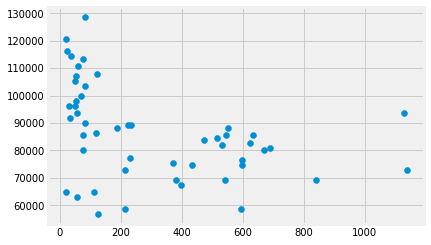

In [39]:
san_raf = pd.read_csv('datasets/s1=09328910_2000,s2=093285002015start-2016_dd_20180410-211609.csv')
san_raf_no_outerliers = san_raf[san_raf.secs_elapsed.between(20000, 300000)]
plt.scatter(san_raf_no_outerliers.free_discharge.values, san_raf_no_outerliers.secs_elapsed.values)

In [2]:
subset1 = pd.read_csv("datasets/freemont_2000-2005_dd_20180410-002554.csv")
subset2 = pd.read_csv("datasets/freemont_dd_20180411-170124")
subset3 = pd.read_csv("datasets/freemont_dd_20180410-213708")
full = pd.concat([subset1, subset2, subset3], ignore_index=True)
del full['Unnamed: 0']

In [3]:
len(full)

80

In [4]:
no_outliers = full[full.secs_elapsed.between(100000, 300000)]

### Seperating X and Y values.

In [143]:
no_log_y = no_outliers.secs_elapsed.values
no_log_x = no_outliers.free_discharge.values
no_log_x_range = np.arange(np.floor(no_log_x.min()), np.ceil(no_log_x.max()) +1)

In [6]:
Y = no_outliers.secs_elapsed.values
X = no_outliers.free_discharge.values

Making x-range

In [7]:
x_range = np.arange(np.floor(X.min()), np.ceil(X.max()) +1)

#### Plot of the default values.

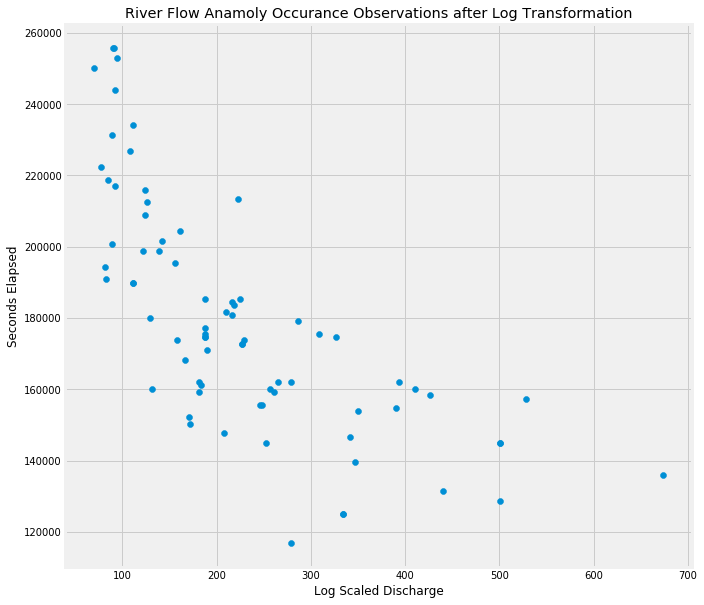

In [8]:
plt.figure(figsize=(10, 10))
plt.scatter(X, Y)
plt.title('River Flow Anamoly Occurance Observations after Log Transformation')
plt.xlabel('Log Scaled Discharge')
plt.ylabel('Seconds Elapsed')
plt.savefig("graphics/log_scaled_discharge.png")
plt.show()

### Running Cross k-Fold Cross Validation to find the best parameters for Linear Regression Models

In [11]:
# Function to use to evaluate the score of the model
def score_func(estimator, X, y):
    return -1*np.linalg.norm(estimator.predict(X) - y, 2)

# # Function to use to evaluate the score of the model
# def score_func(estimator, X, y):
#     return -1*np.linalg.norm(estimator.predict(np.log(X)) - y, 2)

In [12]:
# Setting up pipeline so data is fed into the polynomial features before going into the regression.
lin_reg_pip = Pipeline([('regressor', LinearRegression())])

# Running the Cross Validation to search over the parameter space.
lin_reg_clf = GridSearchCV(lin_reg_pip, {},
                           cv=KFold(n_splits=5, shuffle=True, random_state=45), )
lin_reg_results = lin_reg_clf.fit(X[:, np.newaxis], Y[:, np.newaxis])
lin_reg_results.grid_scores_

C:\Users\stone\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.45233, std: 0.11048, params: {}]

### Presenting the best estimator

In [13]:
lin_reg_results.best_estimator_

Pipeline(memory=None,
     steps=[('regressor', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

### Plotting the linear model

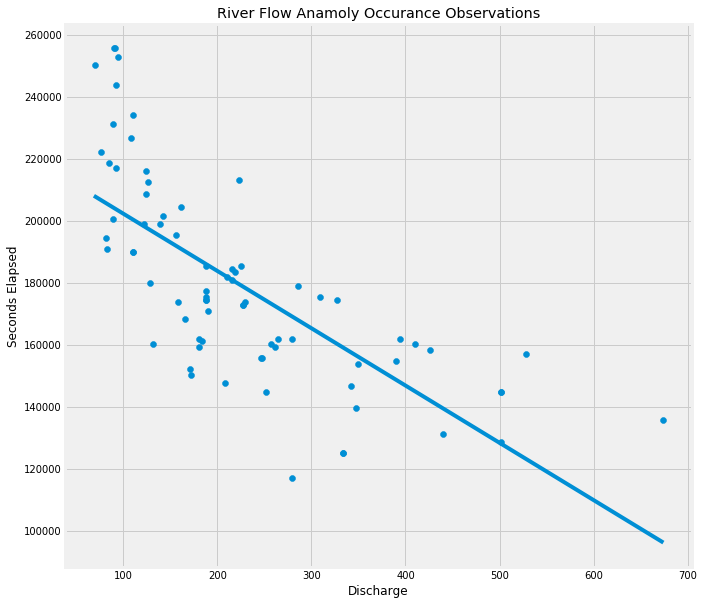

In [14]:
plt.figure(figsize=(10, 10))
plt.scatter(X, Y)
plt.plot(x_range, lin_reg_results.best_estimator_.predict(x_range[:,np.newaxis]))
plt.title('River Flow Anamoly Occurance Observations')
plt.xlabel('Discharge')
plt.ylabel('Seconds Elapsed')
plt.show()

# Running Cross k-Fold Cross Validation to find the best parameters for Ridge Regression Models

In [15]:
ridge_reg_clf = GridSearchCV(Ridge(),  {'alpha': [.0001, .001, .01, .1, 1, 10, 100]},
                             cv=KFold(n_splits=5, shuffle=True, random_state=45))
ridge_reg_results = ridge_reg_clf.fit(X[:, np.newaxis], Y[:, np.newaxis])
ridge_reg_results.grid_scores_

C:\Users\stone\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.45233, std: 0.11048, params: {'alpha': 0.0001},
 mean: 0.45233, std: 0.11048, params: {'alpha': 0.001},
 mean: 0.45233, std: 0.11048, params: {'alpha': 0.01},
 mean: 0.45233, std: 0.11048, params: {'alpha': 0.1},
 mean: 0.45233, std: 0.11048, params: {'alpha': 1},
 mean: 0.45233, std: 0.11048, params: {'alpha': 10},
 mean: 0.45234, std: 0.11046, params: {'alpha': 100}]

#### Presenting the best ridge estimator

In [16]:
ridge_reg_results.best_estimator_

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### Plotting the ridge model

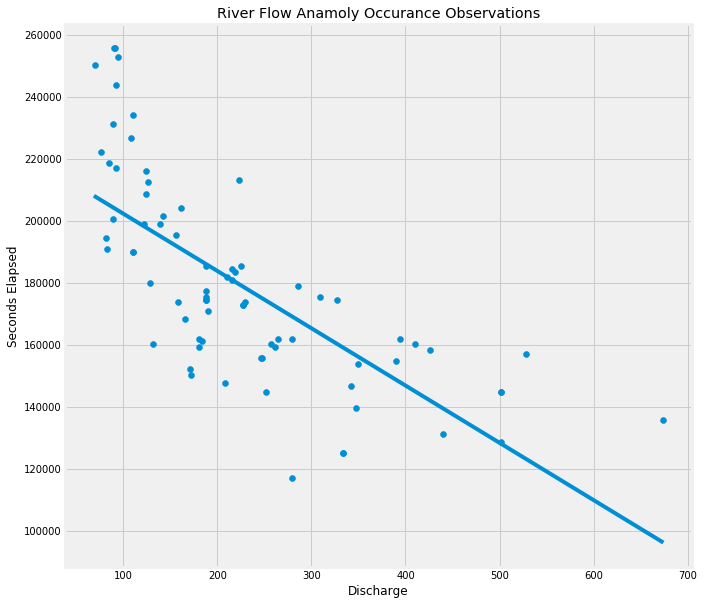

In [17]:
plt.figure(figsize=(10, 10))
plt.scatter(X, Y)
plt.plot(x_range, ridge_reg_results.best_estimator_.predict(x_range[:,np.newaxis]))
plt.title('River Flow Anamoly Occurance Observations')
plt.xlabel('Discharge')
plt.ylabel('Seconds Elapsed')
plt.show()

# Running Cross k-Fold Cross Validation to find the best parameters for Lasso Regression Models 

In [23]:
lassor_reg_clf = GridSearchCV(Lasso(),  {'alpha': [.0001, .001, .01, .1, 1, 10, 100]}, 
                              cv=KFold(n_splits=5, shuffle=True, random_state=45))
lasso_reg_results = lassor_reg_clf.fit(X[:, np.newaxis], Y[:, np.newaxis])
lasso_reg_results.grid_scores_

C:\Users\stone\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.45233, std: 0.11048, params: {'alpha': 0.0001},
 mean: 0.45233, std: 0.11048, params: {'alpha': 0.001},
 mean: 0.45233, std: 0.11048, params: {'alpha': 0.01},
 mean: 0.45233, std: 0.11048, params: {'alpha': 0.1},
 mean: 0.45233, std: 0.11048, params: {'alpha': 1},
 mean: 0.45233, std: 0.11048, params: {'alpha': 10},
 mean: 0.45233, std: 0.11048, params: {'alpha': 100}]

### Presenting the best ridge model

In [24]:
lasso_reg_results.best_estimator_

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

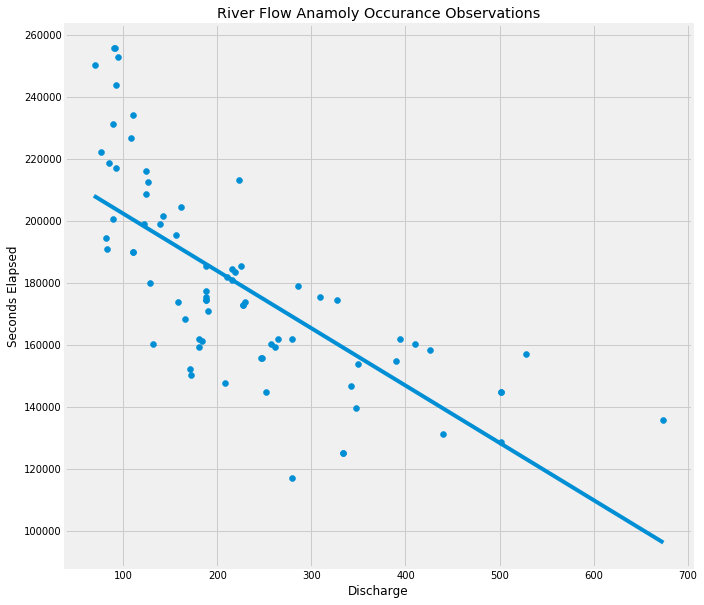

In [25]:
plt.figure(figsize=(10, 10))
plt.scatter(X, Y)
plt.plot(x_range, lasso_reg_results.best_estimator_.predict(x_range[:,np.newaxis]))
plt.title('River Flow Anamoly Occurance Observations')
plt.xlabel('Discharge')
plt.ylabel('Seconds Elapsed')
plt.show()

## Plotting all the best models.

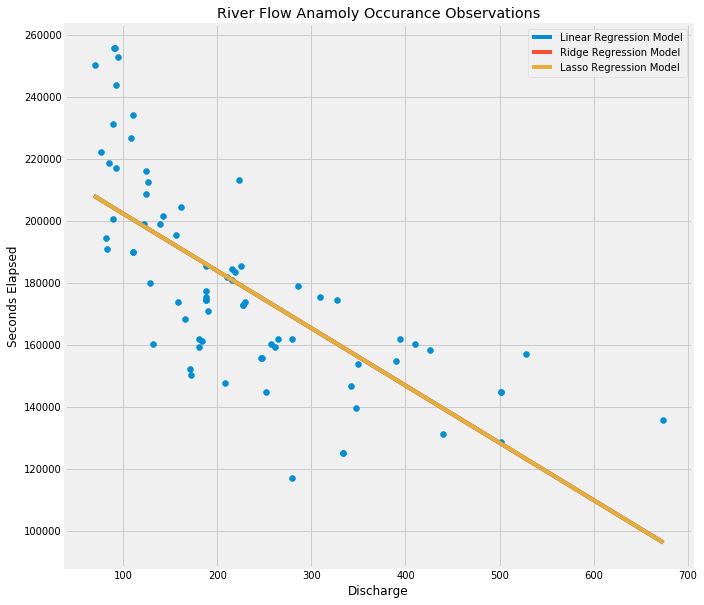

In [26]:
plt.figure(figsize=(10, 10))
plt.scatter(X, Y)
plt.plot(x_range, lin_reg_results.best_estimator_.predict(x_range[:,np.newaxis]), label='Linear Regression Model')
plt.plot(x_range, ridge_reg_results.best_estimator_.predict(x_range[:,np.newaxis]), label='Ridge Regression Model')
plt.plot(x_range, lasso_reg_results.best_estimator_.predict(x_range[:,np.newaxis]), label='Lasso Regression Model')
plt.title('River Flow Anamoly Occurance Observations')
plt.xlabel('Discharge')
plt.ylabel('Seconds Elapsed')
plt.legend()
plt.show()

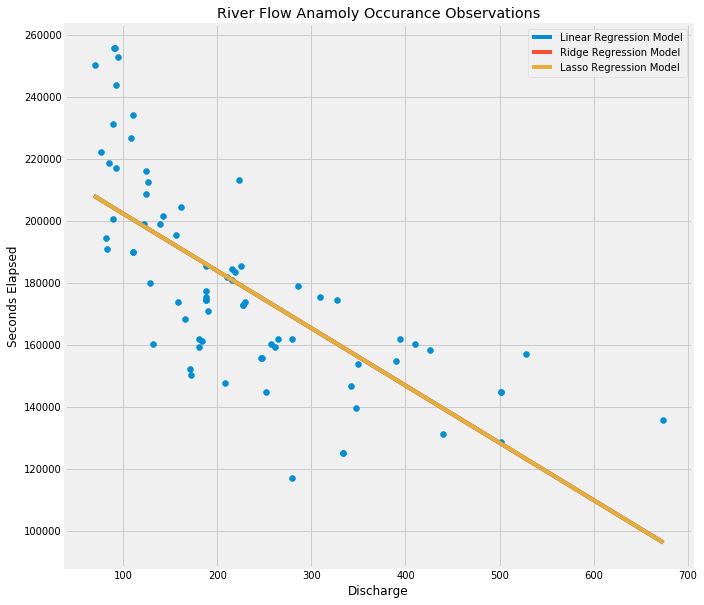

In [31]:
plt.figure(figsize=(10, 10))
plt.scatter(X, Y)
plt.plot(x_range, lin_reg_results.best_estimator_.predict(x_range[:,np.newaxis]), label='Linear Regression Model')
plt.plot(x_range, ridge_reg_results.best_estimator_.predict(x_range[:,np.newaxis]), label='Ridge Regression Model')
plt.plot(x_range, lasso_reg_results.best_estimator_.predict(x_range[:,np.newaxis]), label='Lasso Regression Model')
plt.title('River Flow Anamoly Occurance Observations')
plt.xlabel('Discharge')
plt.ylabel('Seconds Elapsed')
plt.legend()
plt.show()